In [2]:
import os

import pandas as pd
import tensorflow as tf
import numpy as np

from keras import optimizers
from sklearn.preprocessing import MinMaxScaler

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
train_data=pd.read_csv("./data/train.csv")
test_data=pd.read_csv("./data/test.csv")
answer_data = pd.read_csv("./data/gender_submission.csv")

In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
x_columns=["Pclass", "Sex", "Age", "SibSp", "Parch"]

In [74]:
x_columns

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

In [231]:
y_columns = train_data.columns[1]

In [232]:
x_train = train_data[x_columns]

In [233]:
y_train = train_data[y_columns]

In [234]:
x_test = test_data[x_columns]

In [235]:
y_test = answer_data[y_columns]

In [236]:
x_test

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1
...,...,...,...,...,...
413,3,male,NaN,0,0
414,1,female,39.0,0,0
415,3,male,38.5,0,0
416,3,male,NaN,0,0


In [237]:
x_train["Age"]=x_train["Age"].fillna(30)
x_test["Age"]=x_test["Age"].fillna(30)#mean으로 변경

/tmp/ipykernel_682/814835723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["Age"]=x_train["Age"].fillna(30)
/tmp/ipykernel_682/814835723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Age"]=x_test["Age"].fillna(30)


array([[<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

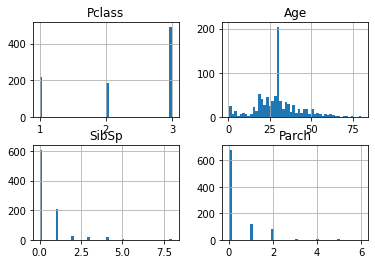

In [238]:
x_train.hist(bins=50)

In [239]:
x_train["Sex"] = x_train["Sex"].map({'male':0,
                                     'female':1})
x_test["Sex"] = x_test["Sex"].map({'male':0,
                                   'female':1})

/tmp/ipykernel_682/1061482577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["Sex"] = x_train["Sex"].map({'male':0,
/tmp/ipykernel_682/1061482577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["Sex"] = x_test["Sex"].map({'male':0,


In [240]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(x_train)
x_train = min_max_scaler.transform(x_train)
x_test = min_max_scaler.transform(x_test)#

In [241]:
x_train

array([[1.        , 0.        , 0.27117366, 0.125     , 0.        ],
       [0.        , 1.        , 0.4722292 , 0.125     , 0.        ],
       [1.        , 1.        , 0.32143755, 0.        , 0.        ],
       ...,
       [1.        , 1.        , 0.37170143, 0.125     , 0.33333333],
       [0.        , 0.        , 0.32143755, 0.        , 0.        ],
       [1.        , 0.        , 0.39683338, 0.        , 0.        ]])

In [242]:
#x_train["Age"]=x_train["Age"].fillna(30)

In [243]:
y_train=y_train.to_numpy()

In [250]:
y_test=y_test.to_numpy()

In [282]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])

In [283]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [287]:
model.fit(x_train, y_train, epochs=50, batch_size=2)

Epoch 1/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4141 - accuracy: 0.8182
Epoch 2/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4131 - accuracy: 0.8294
Epoch 3/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4127 - accuracy: 0.8238
Epoch 4/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4142 - accuracy: 0.8227
Epoch 5/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4132 - accuracy: 0.8350
Epoch 6/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4135 - accuracy: 0.8272
Epoch 7/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4141 - accuracy: 0.8260
Epoch 8/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4136 - accuracy: 0.8215
Epoch 9/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy: 0.8294
Epoch 10/50
446/446 [==============================] - 1s 1ms/step - loss: 0.4122 - accuracy: 0.8249

In [288]:
model.evaluate(x_test,y_test, verbose=2)

14/14 - 0s - loss: 0.2991 - accuracy: 0.9187 - 33ms/epoch - 2ms/step


[0.2991161346435547, 0.9186602830886841]